https://san.lianjia.com/zufang/pg1/#contentList
https://san.lianjia.com/zufang/pg2/#contentList
https://san.lianjia.com/zufang/pg3/#contentList
https://san.lianjia.com/zufang/pg4/#contentList
https://san.lianjia.com/zufang/pg5/#contentList
https://san.lianjia.com/zufang/pg6/#contentList
https://san.lianjia.com/zufang/pg7/#contentList
https://san.lianjia.com/zufang/pg8/#contentList
https://san.lianjia.com/zufang/pg9/#contentList
[ 17.68737733 -64.40498182]
1974.98333843
[80] [3] [ 3196.75857905]


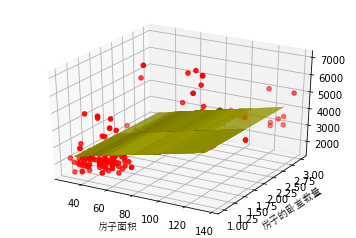

In [60]:
from matplotlib import pyplot as plt
from matplotlib import font_manager
import numpy as np
import requests
import re
from lxml import etree
import time

page = 1
X = [[],[]]#存放所有的x，就是房屋面积
y = []#存放所有的y，就是租房价格
base_url = "https://san.lianjia.com"
while page < 10: #这里设置获取多少页房产信息
    time.sleep(1) #休眠1秒
    #每一页的url地址，page参数是页码
    request_url = base_url + "/zufang/pg" + str(page) + "/#contentList"
    print(request_url)
    headers = {
        'User-Agent':'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/57.0.2987.98 Safari/537.36 LBBROWSER'
}
    respnose = requests.get(request_url,headers=headers) #发请求加入User-Agent头信息，不然链家会拒绝请求
    html = respnose.content.decode("utf-8") #获取html网页字节内容并转换为字符串
    selector = etree.HTML(html)
    list = selector.xpath('//div[@class="content__list--item"]')
    for item in list:
        title = item.xpath("./div/p[1]/a/text()")[0].strip() #通过xpath获取标题
        price = item.xpath("./div/span/em/text()")[0].strip() #通过xpath获取价格，价格y值
        price = price.split("-")[0]
        # 通过xpath获取价格，房屋面积作为样本特征x
        area = item.xpath("./div/p[2]/text()")
        area = "".join(area).replace("\n","")
        m = re.match(r'.* (\d{1,4})㎡.* (\d{1,2})室(\d{1,1})厅(\d{1,1})卫', area)
        if m != None:
            X[0].append(int(m.group(1)))#获取面积
            X[1].append(int(m.group(2)))#获取卧室数量
            y.append(int(price))#获取价格

    page = page + 1

#训练
from sklearn.linear_model import LinearRegression #线性回归模型
from mpl_toolkits.mplot3d import Axes3D #支持3D空间中绘制图形
X = np.array(X)
y = np.array(y)
X = X.T #X转置，为了配置X和y的行数一致
X = X[y <= 10000] 
y = y[y <= 10000] 
linearRegression = LinearRegression()
linearRegression.fit(X,y)
print(linearRegression.coef_)
print(linearRegression.intercept_)
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.scatter(X[:,0],X[:,1],y,color="r") #三维空间中绘制样本数据

a_ = linearRegression.coef_[0] #系数a
b_ = linearRegression.coef_[1] #系数b
c_ = linearRegression.intercept_ #截距
x_ = X[:,0]  #取所有样本第1个特征值（面积）
y_ = X[:,1]  #取所有样本第2个特征值（卧室数量）
x_,y_ = np.meshgrid(x_,y_) #把x_和y_的二维坐标转换为三维坐标，可以在三维空间中显示
z_ = a_ * x_ + b_ * y_ + c_ #训练所得模型，其实就是三维空间的平面方程：z = ax + by + c
ax.plot_surface(x_,y_,z_,color="y",alpha=0.1) #三维空间中画一个平面
predict_x = np.array([[80,3]]) #预测房价输入值，这里有1个样本，2个特征（面积和卧室数量）
predict_y = linearRegression.predict(predict_x) #预测面积为80，卧室数为3的房屋价格

#三维空间中绘制预测房价的那个点
x1 = predict_x[:,0]
y1= predict_x[:,1]
z1 = predict_y
print(x1,y1,z1)
ax.scatter(x1,y1,z1,color="g") 


plt.xlabel("房子面积",fontproperties = myfont)
plt.ylabel("房子的卧室数量",fontproperties = myfont)
plt.show()
